# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

#                      Comparing DIscBIO with Granatum using the CTC dataset

## Required Packages

In [1]:
library(DIscBIO)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

## Loading Granatum outcome

In [2]:
Gclusters <- read.csv(file = "Granatum Clusters.csv", sep = ",",header=F)
head(Gclusters)
Gexpression <- read.csv(file = "Granatum expression.csv", sep = ",",header=F)
rownames(Gexpression)<-Gexpression[,1]
Gexpression<-Gexpression[-1,-1]
head(Gexpression)
Gdegs <- read.csv(file = "Granatum DEGs.csv", sep = ",",header=F)
head(Gdegs)
G_DEGs<-split(Gdegs,Gdegs[,1])

,V1,V2,V3
,<chr>,<chr>,<int>
1,CTC_GSE51827_Patient_1_SC.1_29,A,2
2,CTC_GSE51827_Patient_2_SC.1_29,A,2
3,CTC_GSE51827_Patient_3_SC.1_29,A,2
4,CTC_GSE51827_Patient_4_SC.1..6_29,A,3
5,CTC_GSE51827_Patient_5_SC.1_29,A,2
6,CTC_GSE51827_Patient_5_SC.2_29,A,2


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V1454,V1455,V1456,V1457,V1458,V1459,V1460,V1461,V1462,V1463
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000108846,5.4072848,6.8109078,1.2908134,2.8492094,12.3229485,1.6683082,19.8480464,193.125083,59.174110,45.201623,⋯,0.6402611,0.6408244,0.6459228,0.6373460,0.6434012,0.6306340,0.6371360,0.6341252,0.6227913,0.6456889
ENSG00000173210,1.3567709,1.7423787,0.5709326,0.5732612,0.4440031,0.3086997,1.2850075,9.157289,2.281537,1.257446,⋯,0.6484419,0.6443141,0.6485020,0.6456889,0.6458140,0.6399252,0.6454222,0.6448441,0.6324347,0.6459228
ENSG00000111644,3.3447813,5.9108847,2.0065934,7.5542211,77.1120234,21.5736968,14.7261515,26.093964,132.499523,154.831043,⋯,0.6174161,0.6104179,0.6173906,0.6152936,0.6123675,0.6063123,0.6154869,0.6108782,0.5981478,0.6154869
ENSG00000130402,0.3980837,0.4118329,1.4933259,0.4090522,9.5066519,0.2977547,0.7979768,1.443908,2.759269,1.839443,⋯,0.6329959,0.6253810,0.6313437,0.6299671,6.3107720,6.5014828,6.7422157,0.6272627,0.6161573,0.6310276
ENSG00000106541,18.8177799,1.2721374,2.2301874,22.3207339,2.0601563,13.8736796,4.0764498,2.468832,3.449375,1.291451,⋯,0.6985622,0.6896522,0.6665373,0.6799377,0.6921019,0.6862371,0.6936271,0.6910232,0.6790786,0.6947489
ENSG00000101745,9.6810419,3.6371670,5.3989686,1.6138913,1.9072590,2.9976263,8.6929340,1.086224,7.898958,2.638993,⋯,0.5585965,0.5525144,0.5567729,0.5591832,0.5562217,0.5477898,12.9195377,0.5541856,0.5424044,0.5570941


,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1 vs. 2,ENSG00000244734,0.000487000,0.005599241,-149406.590,149406.590
2,1 vs. 2,ENSG00000163736,0.000009740,0.000374000,15620.516,15620.516
3,1 vs. 2,ENSG00000101162,0.000340000,0.004967912,7281.581,7281.581
4,1 vs. 2,ENSG00000113140,0.000561000,0.006149656,3869.627,3869.627
5,1 vs. 2,ENSG00000158457,0.001088797,0.008659730,3752.162,3752.162
6,1 vs. 2,ENSG00000188536,0.000004980,0.000229000,3631.954,3631.954


## Loading the CTC dataset

The "CTCdataset" dataset consisting of single migratory circulating tumor cells (CTCs) collected from patients with breast cancer. Data are available in the GEO database with accession number GSE51827.The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.

In [3]:
FileName<-"CTCdataset"        # Name of the dataset
#CSV=TRUE                     # If the dataset has ".csv", the user shoud set CSV to TRUE
CSV=FALSE                     # If the dataset has ".rda", the user shoud set CSV to FALSE

if (CSV==TRUE){
    DataSet <- read.csv(file = paste0(FileName,".csv"), sep = ",",header=T)
    rownames(DataSet)<-DataSet[,1]
    DataSet<-DataSet[,-1]
} else{
    load(paste0(FileName,".rda"))
    DataSet<-get(FileName)
}
cat(paste0("The ", FileName," contains:","\n","Genes: ",length(DataSet[,1]),"\n","cells: ",length(DataSet[1,]),"\n"))

The CTCdataset contains:
Genes: 13181
cells: 1462


In [4]:
sc<- DISCBIO(DataSet)       # The DISCBIO class is the central object storing all information generated throughout the pipeline 

## 1. Data Pre-processing

Prior to applying data analysis methods, it is standard to pre-process the raw read counts resulted from the sequencing. The preprocessing approach depends on the existence or absence of ERCC spike-ins. In both cases, it includes normalization of read counts and gene filtering.

Normalization of read counts
To account for RNA composition and sequencing depth among samples (single-cells), the normalization method “median of ratios” is used. This method takes the ratio of the gene instantaneous median to the total counts for all genes in that cell (column median). The gene instantaneous median is the product of multiplying the median of the total counts across all cells (row median) with the read of the target gene in each cell. This normalization method makes it possible to compare the normalized counts for each gene equally between samples.

Gene filtering
The key idea in filtering genes is to appoint the genes that manifest abundant variation across samples. Filtering genes is a critical step due to its dramatic impact on the downstream analysis. Gene filtering can be implemented based on gene expression.

![DataPre-processing](Data-Preprocessing.png)

In [5]:
load("distances.Rdata")
sc@distances<-distances

# Estimating a value for the "minexpr" parameter
S<-summary(rowMeans(DataSet,na.rm=TRUE))            # It gives an idea about the overall expression of the genes
minexpr= S[3]        

# Estimating a value for the "minnumber" parameters
minnumber= round(length(DataSet[1,])/10)                             # To be expressed in at 10% of the cells.

sc<-Normalizedata(sc, mintotal=1, minexpr=minexpr, minnumber=minnumber, maxexpr=Inf, downsample=FALSE, dsn=1, rseed=17000) 
sc<-FinalPreprocessing(sc,GeneFlitering="ExpF",export = TRUE)        # The GeneFiltering should be set to "ExpF"

The gene filtering method = Noise filtering

The Filtered Normalized dataset contains:
Genes: 209
cells: 1462



The Filtered Normalized dataset was saved as: filteredDataset.Rdata



## Shared genes in the outcome of the pre-processing of DIscBIO and Granatum

In [6]:
SharedGenes<-cbind(rownames(sc@fdata),rownames(Gexpression))
colnames(SharedGenes)<-c("DIscBIO","Granatum")
gData<-rownames(Gexpression)
dData<-rownames(sc@fdata) 
idx_genes <- is.element(gData,dData)
SharedGenes<-gData[idx_genes]   
cat(paste0("There are ", length(SharedGenes)," shared genes between DIscBIO and Granatum.","\n"))  

Warning message in cbind(...):
“number of rows of result is not a multiple of vector length (arg 1)”


There are 88 shared genes between DIscBIO and Granatum.


## 2. DIscBIO Clustering using K-means (Euclidean)

In [7]:
set.seed(222)
Km<-stats::kmeans(as.matrix(t(sc@fdata)),4)
sc@kmeans$kpart<-Km[[1]]
sc@cpart=Km[[1]]

#### Evaluating the stability and consistancy of the clusters generated by DIscBIO

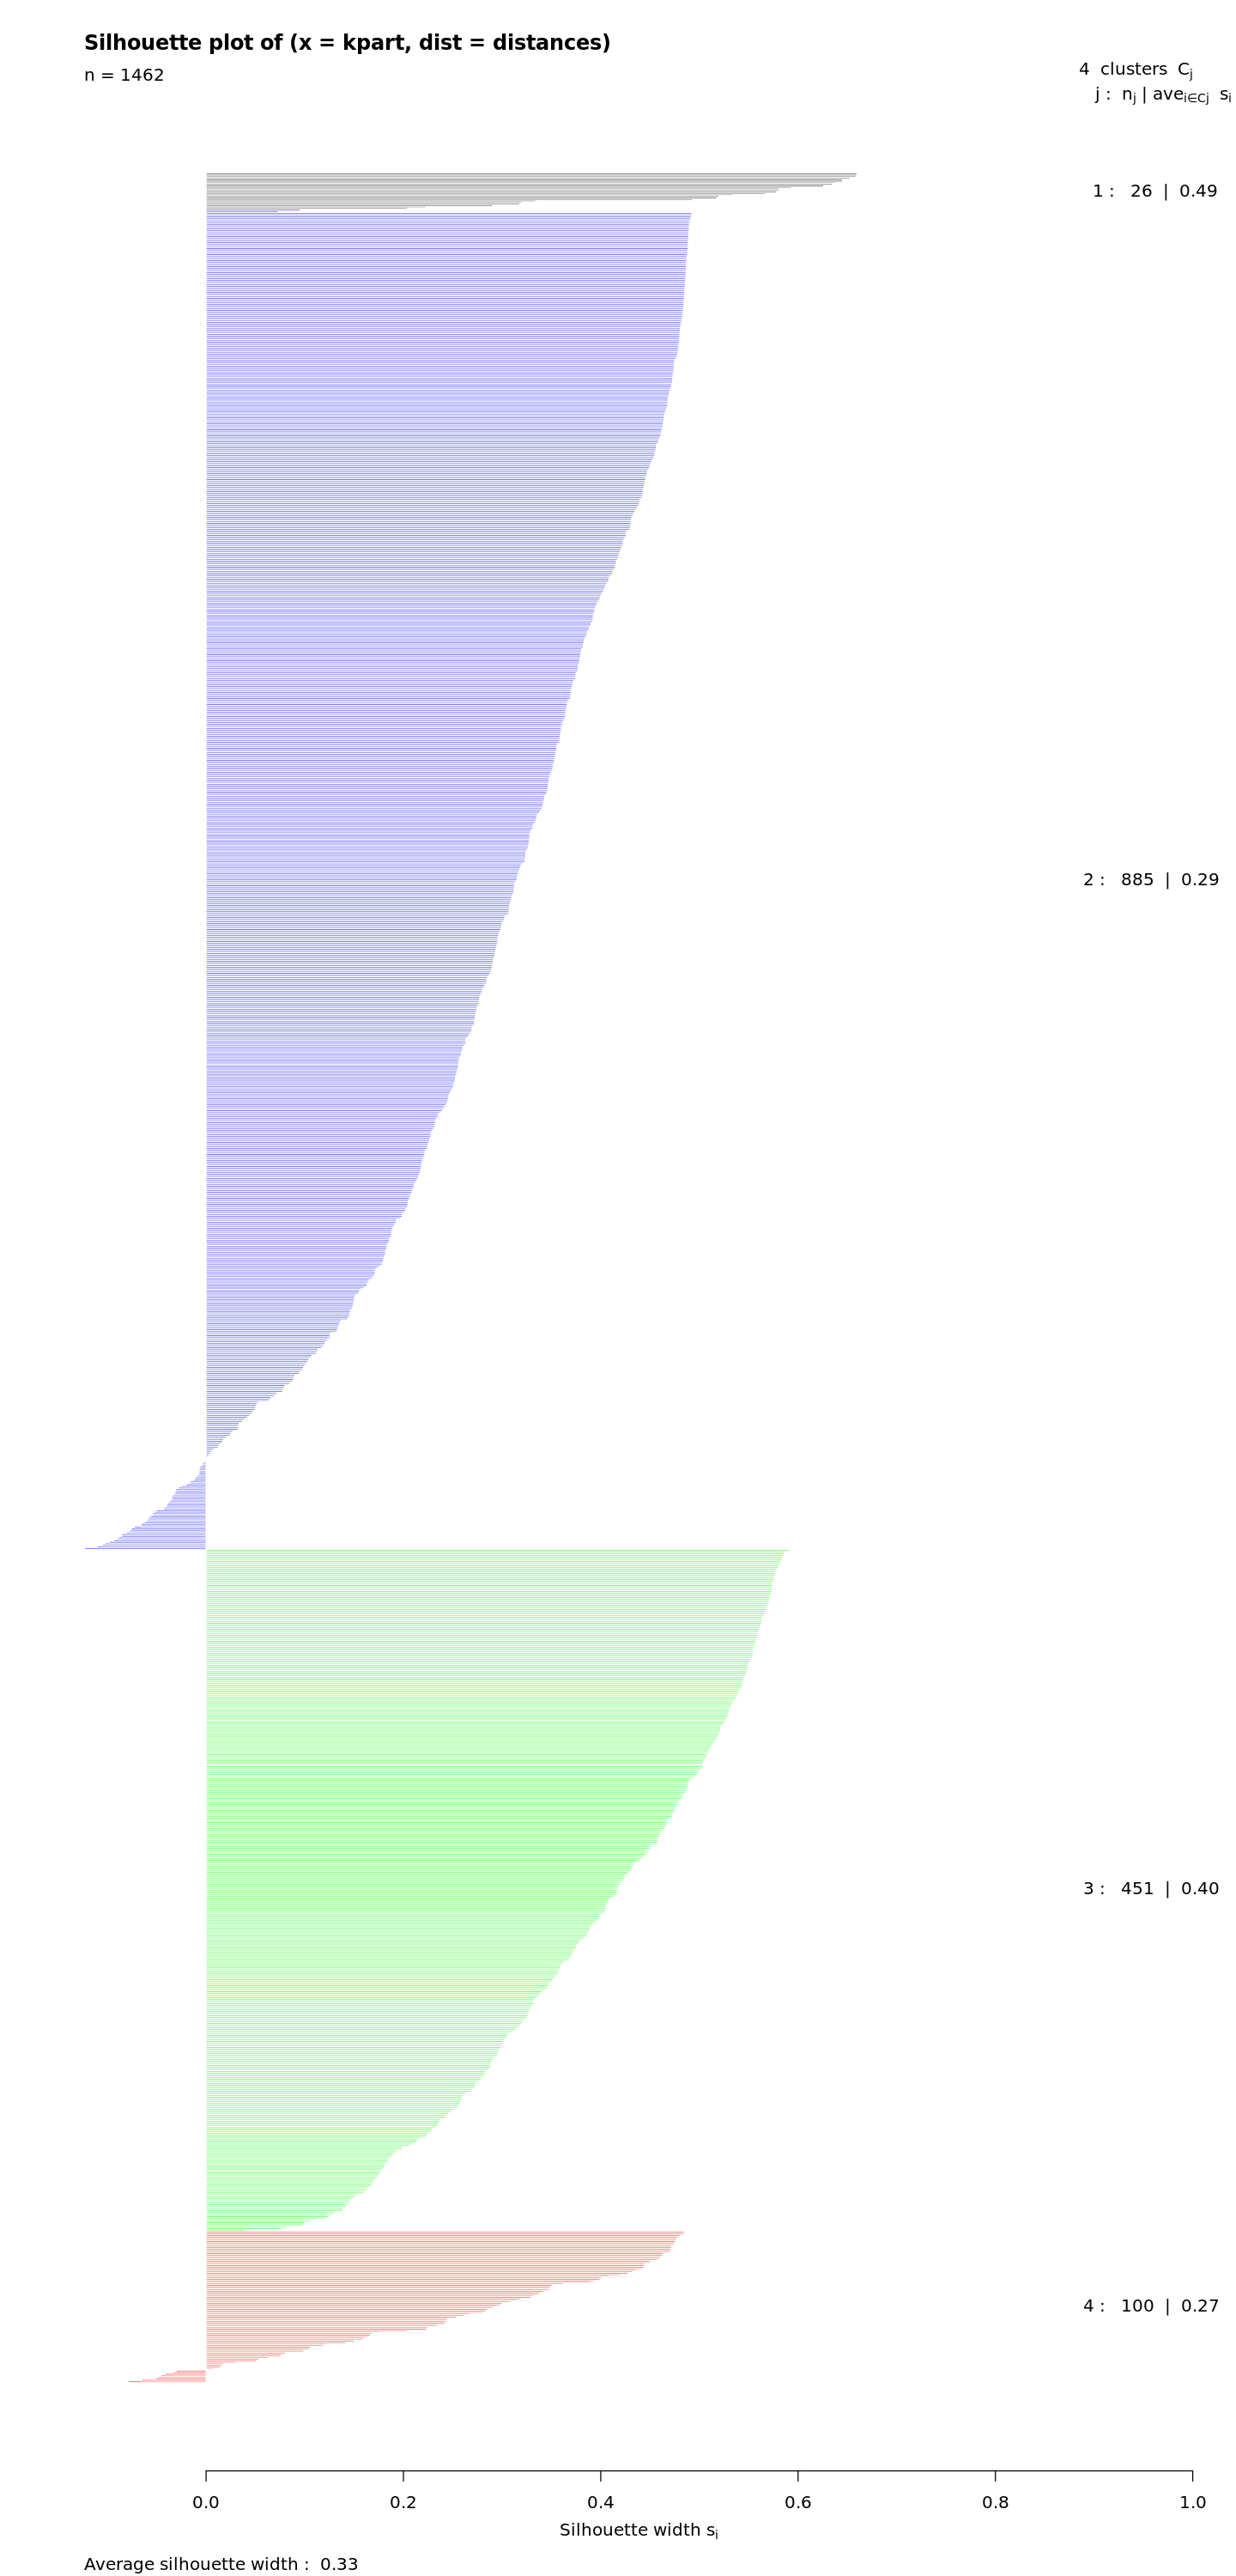

In [8]:
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(sc,K=4)  

[1] 0.430 0.348 0.639 0.576

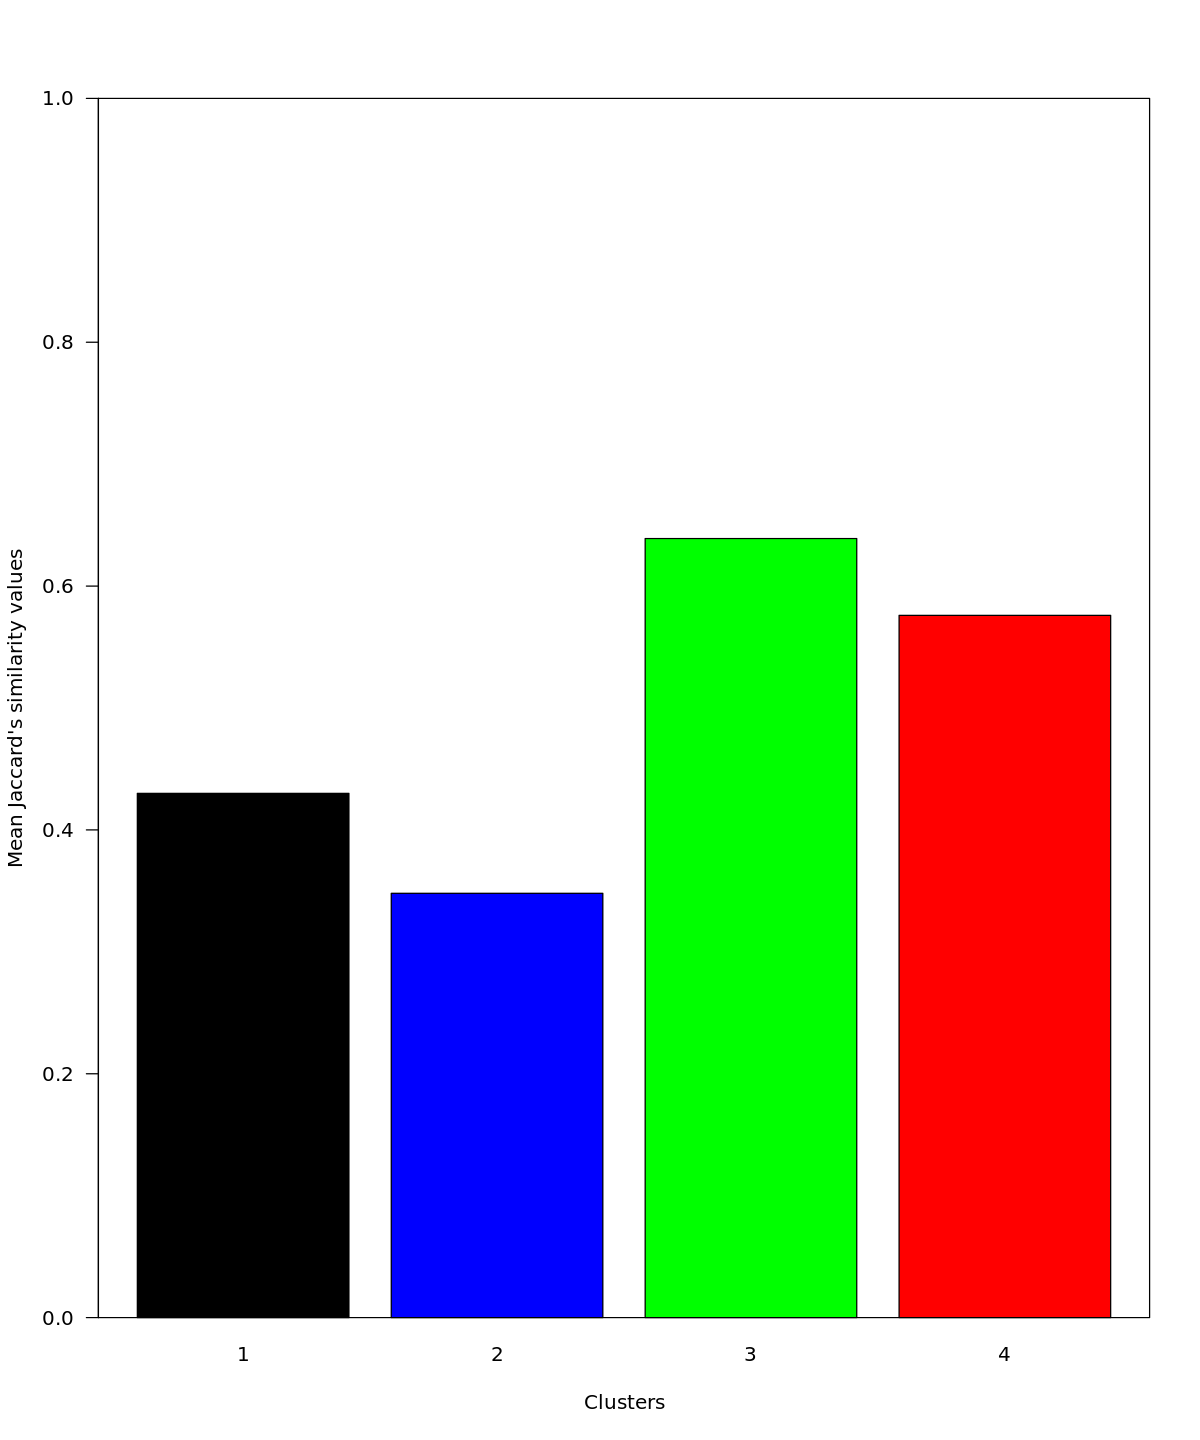

In [9]:
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(sc,Clustering="K-means", K=4, plot = TRUE)     # Jaccard 

In [10]:
f<-c(0.43, 0.348, 0.639, 0.576)
cat(paste0("The mean Jaccard of all the clusters is  ", round(mean(f), digits=1),"\n"))

The mean Jaccard of all the clusters is  0.5


### CTC clusters with Granatum based on K-means (Euclidean)

In [11]:
SharedCells<- data.frame(sc@kmeans$kpart,Gclusters[,3])
same<-c()
for (i in 1: length(SharedCells[,1])){
	if (SharedCells[i,1]=="1" & SharedCells[i,2]=="2"){
		same<-c(same,i)
	}
	if (SharedCells[i,1]=="2" & SharedCells[i,2]=="3"){
		same<-c(same,i)
	}
	if (SharedCells[i,1]=="3" & SharedCells[i,2]=="4"){
		same<-c(same,i)
	}
	if (SharedCells[i,1]=="4" & SharedCells[i,2]=="1"){
		same<-c(same,i)
	}
}

cat(paste0("There are ", length(same),"\n"))
cat(paste0(round((length(same)/length(SharedCells[,1])) * 100,digits=1),"%", " of the cells are shared between DIscBIO and Granatum","\n"))


There are 763
52.2% of the cells are shared between DIscBIO and Granatum


In [12]:
Granatum<-sc
colnames(Gexpression)<-colnames(sc@fdata)
Granatum@fdata<-Gexpression
Granatum@kmeans$kpart<-Gclusters[,3]
names(Granatum@kmeans$kpart)<-Gclusters[,1]

#### Evaluating the stability and consistancy of the clusters generated by DIscBIO

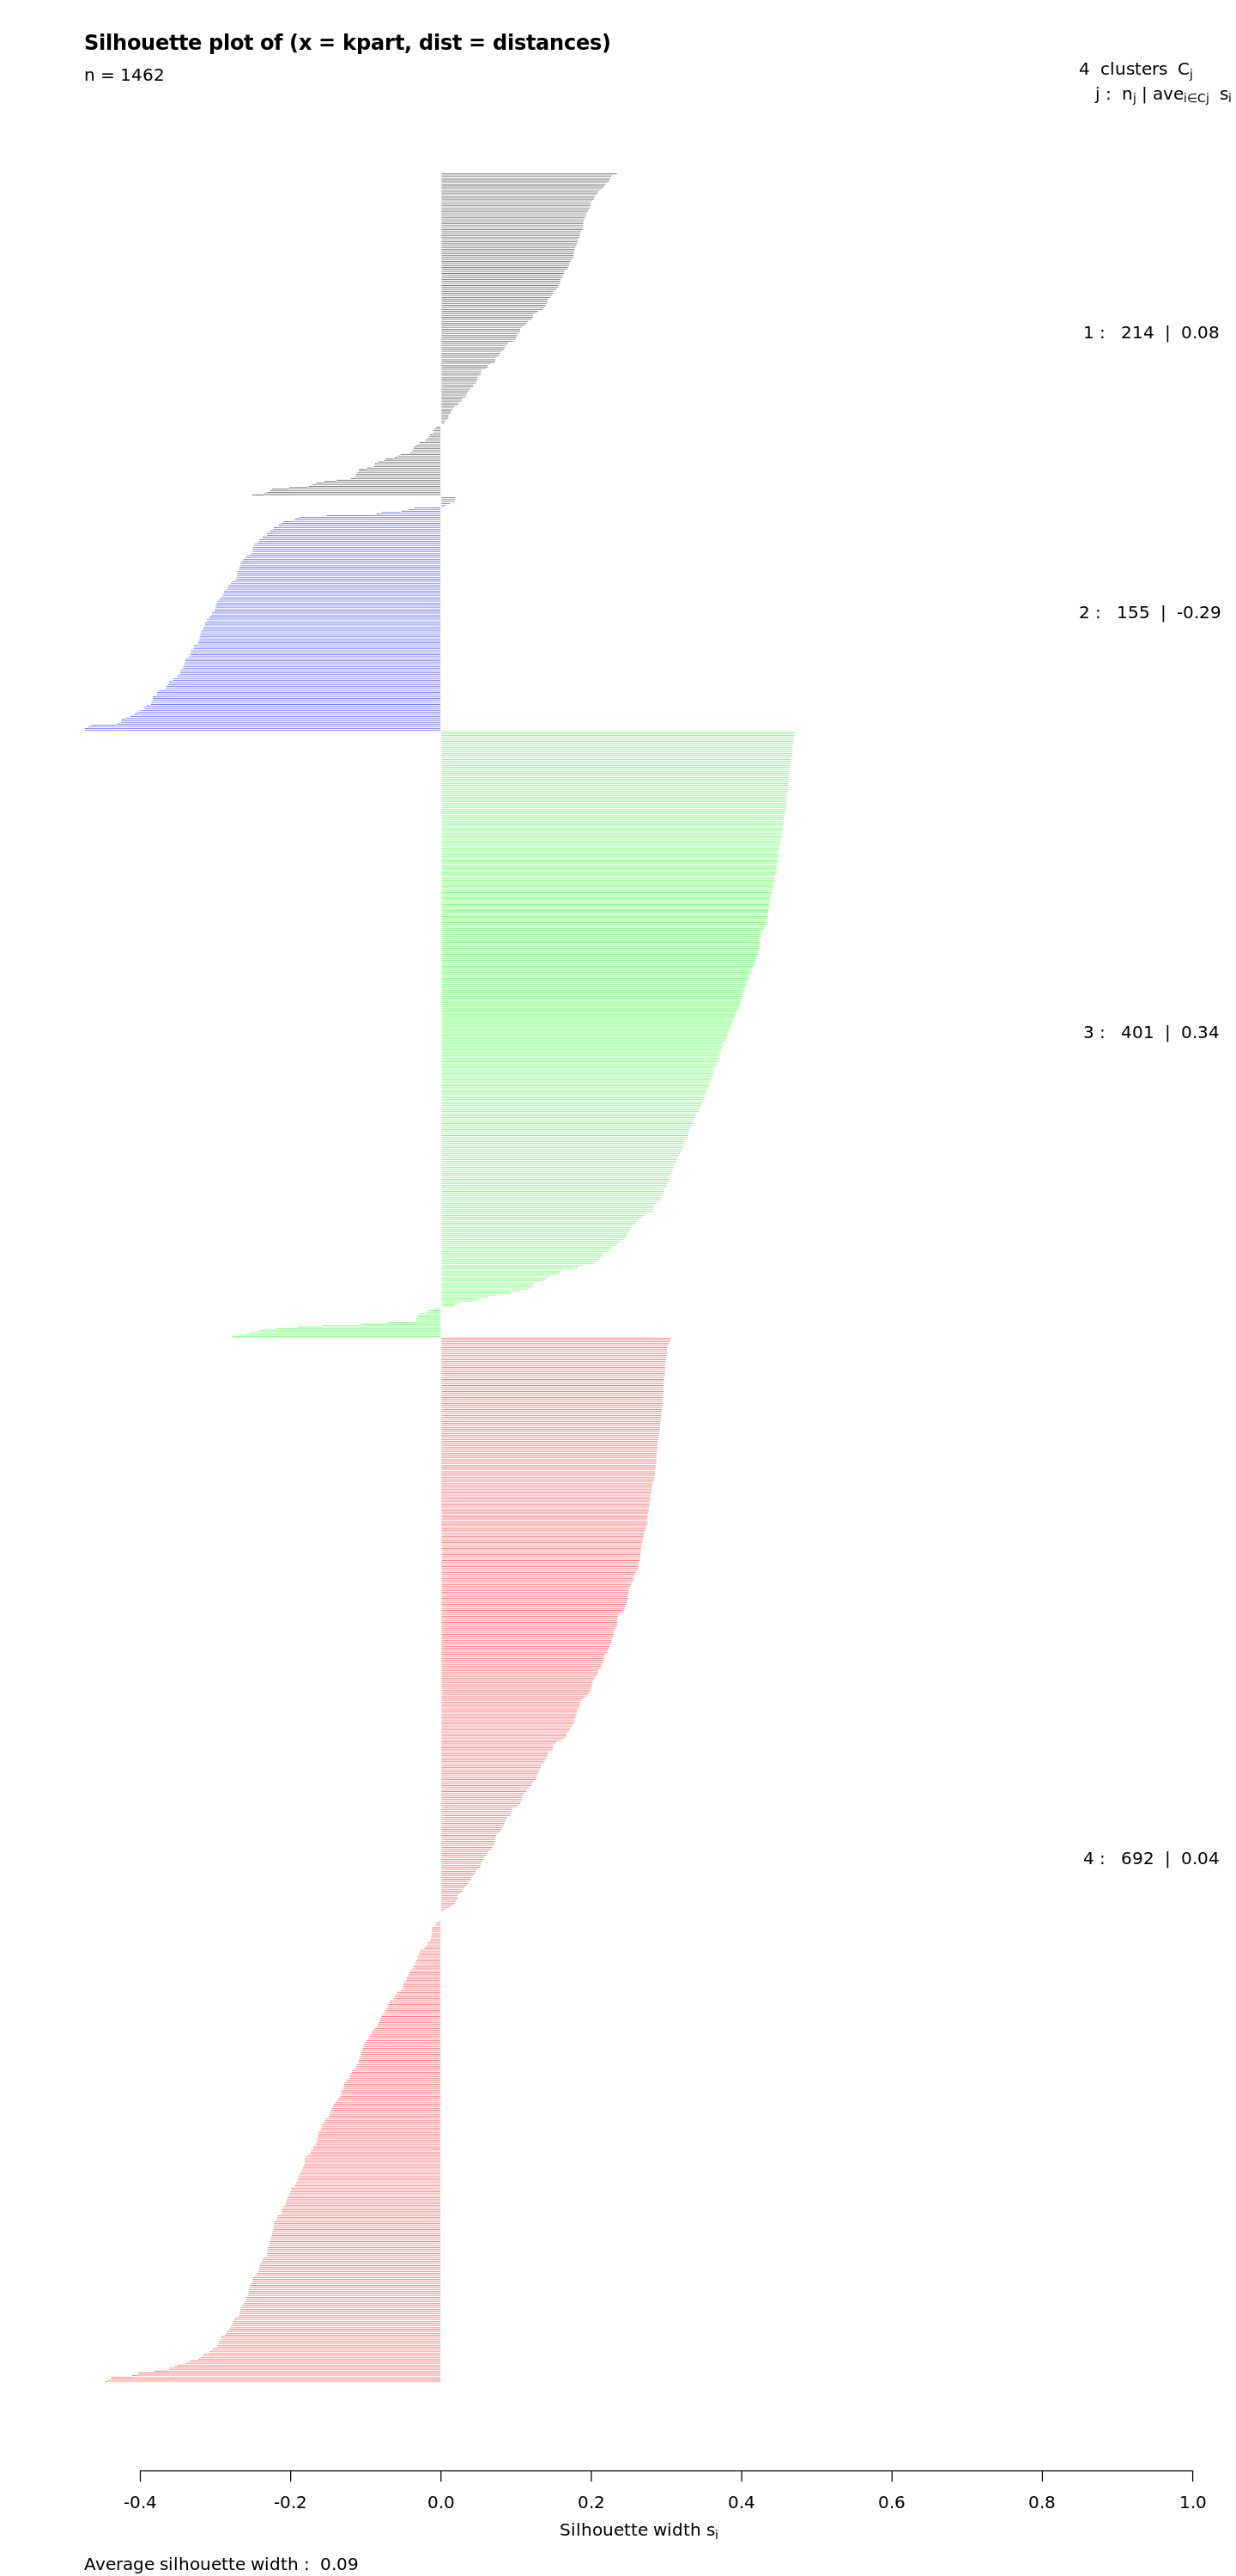

In [13]:
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(Granatum,K=4)  

[1] 0.611 0.273 0.305 0.625

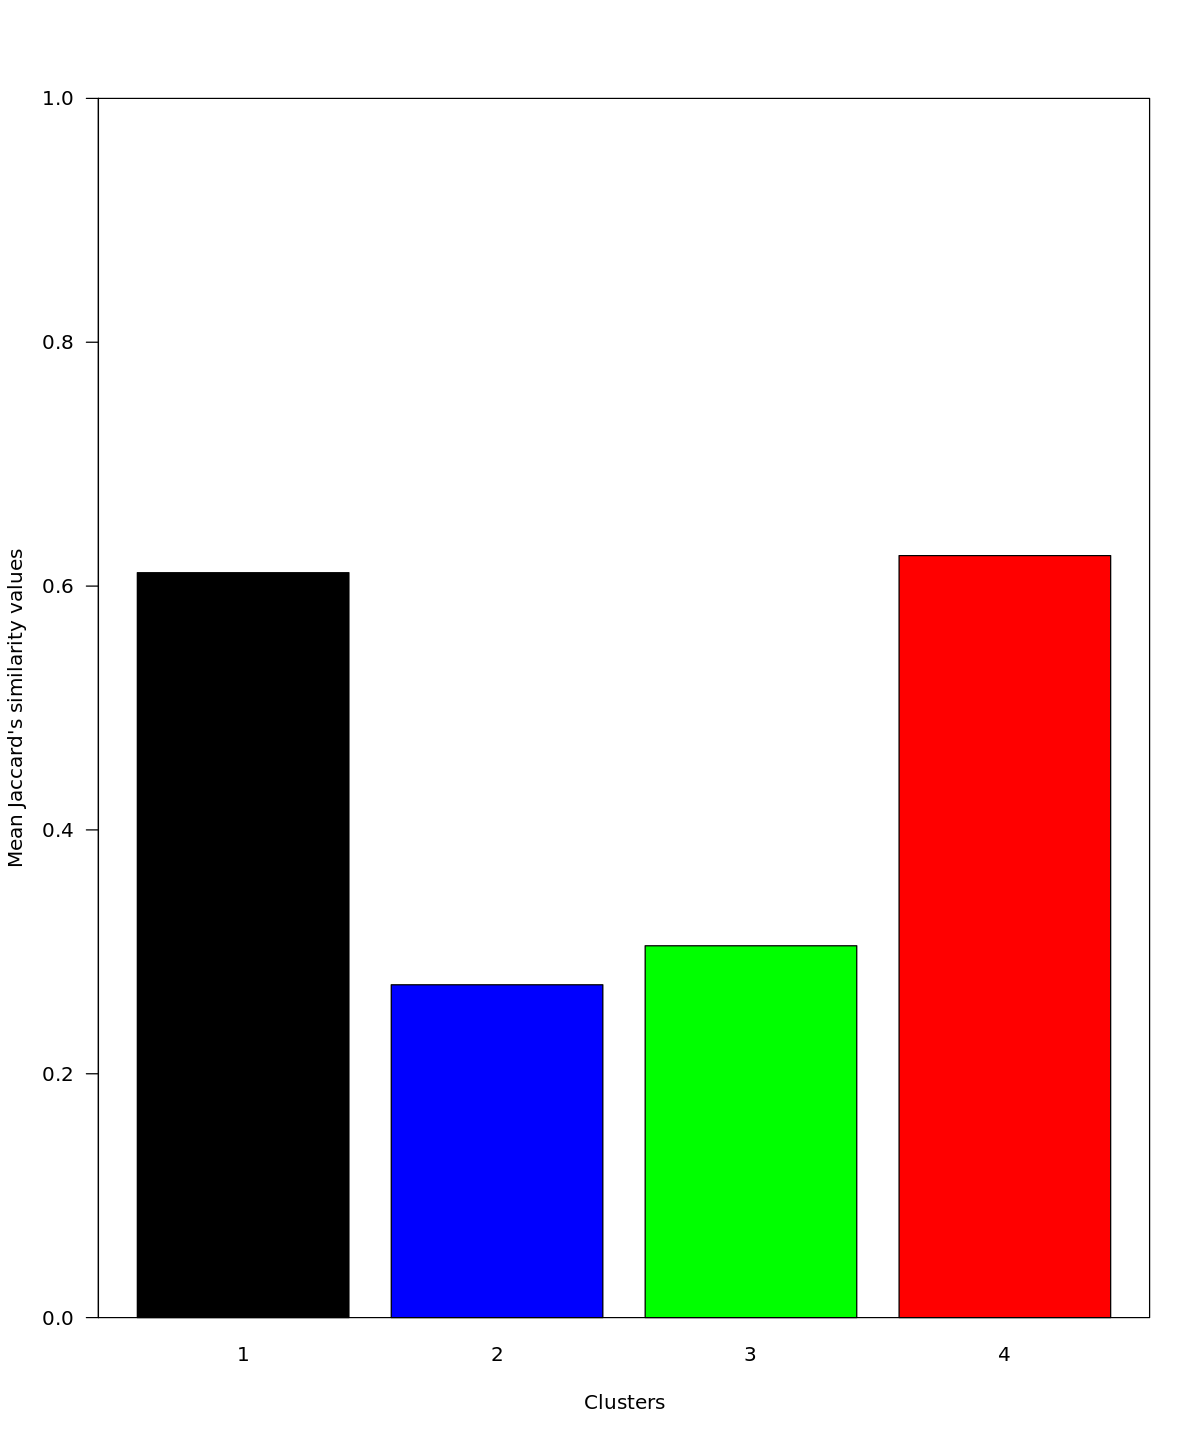

In [14]:
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(Granatum,Clustering="K-means", K=4, plot = TRUE)     # Jaccard 

In [15]:
f<-c(0.611, 0.273, 0.305, 0.625)
cat(paste0("The mean Jaccard of all the clusters is  ", round(mean(f), digits=1),"\n"))

The mean Jaccard of all the clusters is  0.5


### Determining differentially expressed genes for K-means Clustering using DIscBIO

In [16]:
#cdiff<-DEGanalysis(sc,Clustering="K-means",K=4,fdr=0.05,name="DIscBIO",export = TRUE,quiet=TRUE)   ####### differential expression analysis between all clusters
#### To show the result table
#head(cdiff[[1]])                  # The first component 
#head(cdiff[[2]])                  # The second component

![DIscBIO_DEGs](DIscBIO_DEGs.png)

## Comparing DEGs form DIscBIO and Granatum

In [17]:
#df1<-rbind(read.csv(file=paste0(cdiff[[2]][1,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][1,6]),head=TRUE,sep=","))
df1<-rbind(read.csv(file="Up-regulated-DIscBIOCl4inCl1VSCl4.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl4inCl1VSCl4.csv",head=TRUE,sep=","))
genes1vs4<-df1[,4]

#df2<-rbind(read.csv(file=paste0(cdiff[[2]][2,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][2,6]),head=TRUE,sep=","))
df2<-rbind(read.csv(file="Up-regulated-DIscBIOCl3inCl1VSCl3.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl3inCl1VSCl3.csv",head=TRUE,sep=","))
genes1vs3<-df2[,4]

#df3<-rbind(read.csv(file=paste0(cdiff[[2]][3,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][3,6]),head=TRUE,sep=","))
df3<-rbind(read.csv(file="Up-regulated-DIscBIOCl2inCl1VSCl2.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl2inCl1VSCl2.csv",head=TRUE,sep=","))
genes1vs2<-df3[,4]

#df4<-rbind(read.csv(file=paste0(cdiff[[2]][4,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][4,6]),head=TRUE,sep=","))
df4<-rbind(read.csv(file="Up-regulated-DIscBIOCl3inCl4VSCl3.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl3inCl4VSCl3.csv",head=TRUE,sep=","))
genes3vs4<-df4[,4]

#df5<-rbind(read.csv(file=paste0(cdiff[[2]][5,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][5,6]),head=TRUE,sep=","))
df5<-rbind(read.csv(file="Up-regulated-DIscBIOCl4inCl2VSCl4.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl4inCl2VSCl4.csv",head=TRUE,sep=","))
genes2vs4<-df5[,4]

#df6<-rbind(read.csv(file=paste0(cdiff[[2]][6,4]),head=TRUE,sep=","),read.csv(file=paste0(cdiff[[2]][6,6]),head=TRUE,sep=","))
df6<-rbind(read.csv(file="Up-regulated-DIscBIOCl2inCl3VSCl2.csv",head=TRUE,sep=","),read.csv(file="Low-regulated-DIscBIOCl2inCl3VSCl2.csv",head=TRUE,sep=","))
genes3vs2<-df6[,4]


####  [CL1 vs CL2  DIscBIO]   vs   [CL2 vs CL3 Granatum]

In [18]:
#################  [CL1 vs CL2  DIscBIO]   vs   [CL2 vs CL3 Granatum]
dData<-genes1vs2
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL1 vs CL2","\n"))
target=G_DEGs$`2 vs. 3`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
cat(paste0("There are  ", length(targetGeneList), " DEGs detected by Granatum in CL2 vs CL3","\n"))
gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df3[idx_genes,]

There are  133 DEGs detected by DIscBIO in CL1 vs CL2
There are  212 DEGs detected by Granatum in CL2 vs CL3
There are  51 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,6,186,TMSB10,ENSG00000034510,7315.95,7315.95,1,1.916397e+01,0.000000000
10,17,32,CXCL2,ENSG00000081041,4625.30,4625.30,1,5.631110e+09,0.000000000
18,31,65,HSPB1,ENSG00000106211,3898.20,3898.20,1,4.161295e+01,0.000000000
20,38,139,RPL34,ENSG00000109475,5204.40,5204.40,1,6.498620e+00,0.000000000
21,40,3,ACRBP,ENSG00000111644,3020.30,3020.30,1,1.683022e+01,0.000000000
23,44,125,RBM25,ENSG00000119707,5487.20,5487.20,1,2.160221e+02,0.000000000
27,49,134,RPL23,ENSG00000125691,4478.00,4478.00,1,6.296690e+00,0.000000000
31,59,140,RPL35,ENSG00000136942,3324.35,3324.35,1,8.804834e+00,0.000000000
34,63,131,RPL11,ENSG00000142676,4457.15,4457.15,1,5.475404e+00,0.000000000


####  [CL1 vs CL3  DIscBIO]   vs   [CL2 vs CL4 Granatum]

In [19]:
#################  [CL1 vs CL3  DIscBIO]   vs   [CL2 vs CL4 Granatum]
dData<-genes1vs3
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL1 vs CL3","\n"))
target=G_DEGs$`2 vs. 4`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
cat(paste0("There are  ", length(targetGeneList), " DEGs detected by Granatum in CL2 vs CL4","\n"))

gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df2[idx_genes,]

There are  169 DEGs detected by DIscBIO in CL1 vs CL3
There are  220 DEGs detected by Granatum in CL2 vs CL4
There are  74 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
6,6,120,RAB27B,ENSG00000041353,2758.80,2758.80,1,2.474279e+02,0
7,7,173,SLC2A3,ENSG00000059804,3465.85,3465.85,1,2.196246e+01,0
11,11,123,RASGRP2,ENSG00000068831,4991.70,4991.70,1,1.321138e+03,0
18,18,32,CXCL2,ENSG00000081041,4867.25,4867.25,1,1.460625e+10,0
21,21,185,TMEM40,ENSG00000088726,3064.70,3064.70,1,2.722438e+01,0
22,22,117,PTGS1,ENSG00000095303,2287.65,2287.65,1,1.466796e+01,0
27,27,209,ZMYND8,ENSG00000101040,3522.50,3522.50,1,5.818668e+01,0
28,28,93,MYL9,ENSG00000101335,2227.40,2227.40,1,4.668762e+00,0
31,31,27,COTL1,ENSG00000103187,1744.85,1744.85,1,8.397662e+00,0


####  [CL1 vs CL4  DIscBIO]   vs   [CL1 vs CL2 Granatum]

In [20]:
#################  [CL1 vs CL4  DIscBIO]   vs   [CL1 vs CL2 Granatum]
dData<-genes1vs4
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL1 vs CL4","\n"))
target=G_DEGs$`1 vs. 2`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
cat(paste0("There are  ", length(targetGeneList), " DEGs detected by Granatum in CL1 vs CL2","\n"))

gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df1[idx_genes,]

There are  180 DEGs detected by DIscBIO in CL1 vs CL4
There are  218 DEGs detected by Granatum in CL1 vs CL2
There are  71 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
5,6,120,RAB27B,ENSG00000041353,709.75,709.75,1,4.234006e+02,0
6,7,173,SLC2A3,ENSG00000059804,783.45,783.45,1,2.166678e+01,0
16,18,32,CXCL2,ENSG00000081041,970.20,970.20,1,3.420071e+10,0
19,21,185,TMEM40,ENSG00000088726,755.60,755.60,1,3.651309e+01,0
20,22,117,PTGS1,ENSG00000095303,550.10,550.10,1,1.326978e+01,0
24,27,209,ZMYND8,ENSG00000101040,1030.50,1030.50,1,1.082250e+02,0
25,33,180,TGFB1,ENSG00000105329,848.00,848.00,1,1.890163e+02,0
26,34,171,SERPINE1,ENSG00000106366,1048.35,1048.35,1,4.865769e+02,0
28,36,102,P2RX1,ENSG00000108405,978.40,978.40,1,8.097260e+02,0


####  [CL2 vs CL3  DIscBIO]   vs   [CL3 vs CL4 Granatum]

In [21]:
#################  [CL2 vs CL3  DIscBIO]   vs   [CL3 vs CL4 Granatum]
dData<-genes3vs2
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL2 vs CL3","\n"))
target=G_DEGs$`3 vs. 4`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
cat(paste0("There are  ", length(targetGeneList), " DEGs detected by Granatum in CL3 vs CL4","\n"))

gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df6[idx_genes,]

There are  187 DEGs detected by DIscBIO in CL2 vs CL3
There are  227 DEGs detected by Granatum in CL3 vs CL4
There are  84 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
3,3,16,CD74,ENSG00000019582,37390.75,37390.75,1,1.276170e+07,0
4,4,186,TMSB10,ENSG00000034510,118100.80,118100.80,1,2.046809e+01,0
5,5,137,RPL31,ENSG00000071082,101610.85,101610.85,1,2.811637e+10,0
10,11,147,RPLP0,ENSG00000089157,102865.45,102865.45,1,2.017511e+10,0
15,16,65,HSPB1,ENSG00000106211,51118.50,51118.50,1,3.586486e+00,0
16,17,133,RPL19,ENSG00000108298,103917.35,103917.35,1,3.213299e+10,0
18,20,139,RPL34,ENSG00000109475,108582.25,108582.25,1,1.445390e+01,0
20,22,76,KRT18,ENSG00000111057,66571.05,66571.05,1,1.000000e+00,0
24,26,151,RPS12,ENSG00000112306,104815.45,104815.45,1,1.463882e+01,0


####  [CL2 vs CL4  DIscBIO]   vs   [CL1 vs CL3 Granatum]

In [22]:
#################  [CL2 vs CL4  DIscBIO]   vs   [CL1 vs CL3 Granatum]
dData<-genes2vs4
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL2 vs CL4","\n"))
target=G_DEGs$`1 vs. 3`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
length(targetGeneList)
cat(paste0("There are  ", length(targetGeneList), " DEGs detected by Granatum in CL1 vs CL3","\n"))

gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df5[idx_genes,]

There are  200 DEGs detected by DIscBIO in CL2 vs CL4


[1] 229

There are  229 DEGs detected by Granatum in CL1 vs CL3
There are  89 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2,2,111,PRKAR2B,ENSG00000005249,22543.25,22543.25,1,1.186259e+01,0
6,6,120,RAB27B,ENSG00000041353,29245.10,29245.10,1,1.746580e+01,0
7,7,173,SLC2A3,ENSG00000059804,27416.95,27416.95,1,1.403941e+01,0
9,11,123,RASGRP2,ENSG00000068831,28195.00,28195.00,1,4.964944e+10,0
14,17,32,CXCL2,ENSG00000081041,20556.70,20556.70,1,1.399085e+01,0
17,20,185,TMEM40,ENSG00000088726,29389.70,29389.70,1,8.580335e+00,0
18,21,117,PTGS1,ENSG00000095303,19955.70,19955.70,1,7.306088e+02,0
22,25,209,ZMYND8,ENSG00000101040,35899.25,35899.25,1,1.129910e+01,0
23,26,197,TUBB1,ENSG00000101162,27873.85,27873.85,1,6.575802e+00,0


####  [CL3 vs CL4  DIscBIO]   vs   [CL1 vs CL4 Granatum]

In [23]:
#################  [CL3 vs CL4  DIscBIO]   vs   [CL1 vs CL4 Granatum]
dData<-genes3vs4
length(dData)
cat(paste0("There are  ", length(dData), " DEGs detected by DIscBIO in CL3 vs CL4","\n"))
target=G_DEGs$`1 vs. 4`
S1<-subset(target,target[,6]>1.96)
targetGeneList<-S1[,2]
length(targetGeneList)

gData<-targetGeneList
idx_genes <- is.element(dData,gData)
SharedGenes<-dData[idx_genes]   
cat(paste0("There are  ", length(SharedGenes), " DEGs shared between DIscBIO and Granatum","\n"))
df4[idx_genes,]

[1] 149

There are  149 DEGs detected by DIscBIO in CL3 vs CL4


[1] 211

There are  61 DEGs shared between DIscBIO and Granatum


,X,Row,Gene.ID,Gene.Name,Score.d.,Numerator.r.,Denominator.s.s0.,Fold.Change,q.value...
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2,4,186,TMSB10,ENSG00000034510,5787.45,5787.45,1,5.118726e+08,0.000000000
4,6,137,RPL31,ENSG00000071082,3653.85,3653.85,1,1.000000e+00,0.000000000
11,18,93,MYL9,ENSG00000101335,7843.65,7843.65,1,3.111100e+00,0.000000000
14,21,27,COTL1,ENSG00000103187,6423.20,6423.20,1,2.764530e+00,0.000000000
15,22,180,TGFB1,ENSG00000105329,5538.60,5538.60,1,1.356179e+00,0.000000000
16,23,65,HSPB1,ENSG00000106211,3739.40,3739.40,1,3.559201e+08,0.000000000
21,30,151,RPS12,ENSG00000112306,4115.60,4115.60,1,2.973225e+08,0.000000000
22,33,203,WIPF1,ENSG00000115935,3760.60,3760.60,1,1.275972e+00,0.000000000
23,34,108,PLEK,ENSG00000115956,5890.40,5890.40,1,1.902519e+00,0.000000000


### Plotting the clusters generated by DIscBIO

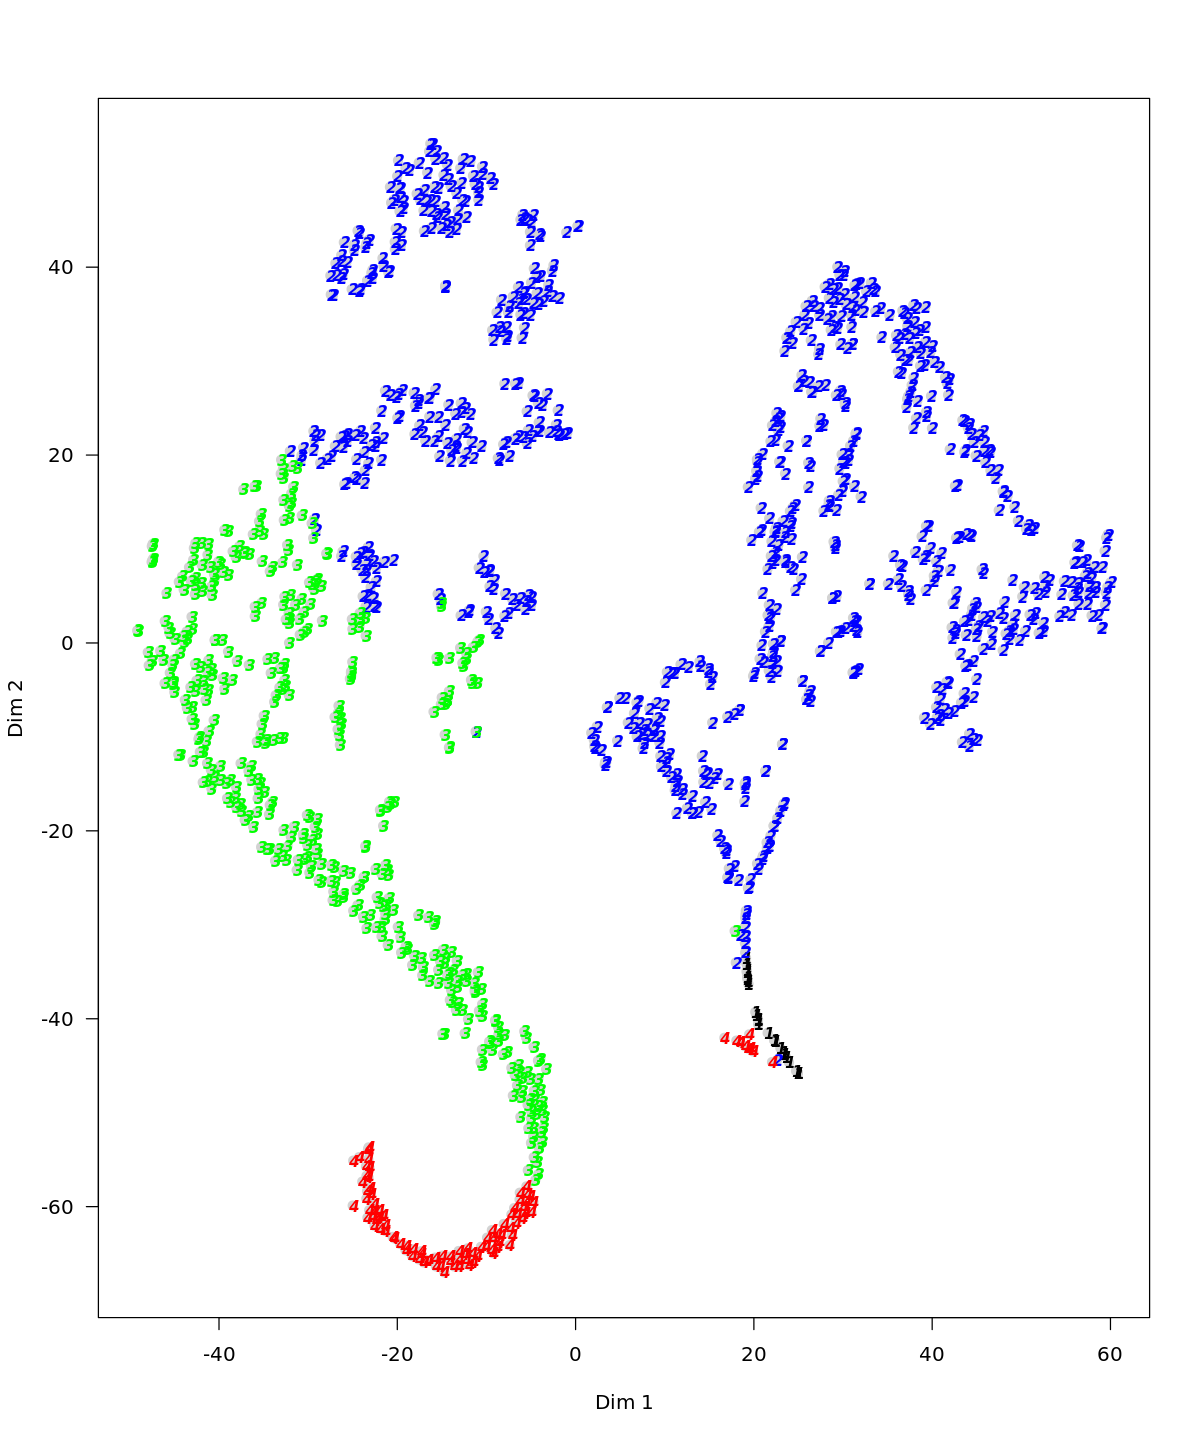

In [24]:
load("tSNE.Rdata")
sc@tsne<-tSNE
#sc<- comptSNE(sc,rseed=15555,max_iter=500, epoch=100,quiet = T)          # to perform the computation of a t-SNE map
plottSNE(sc)

### Pseudo-time ordering of cells generated by DIscBIO

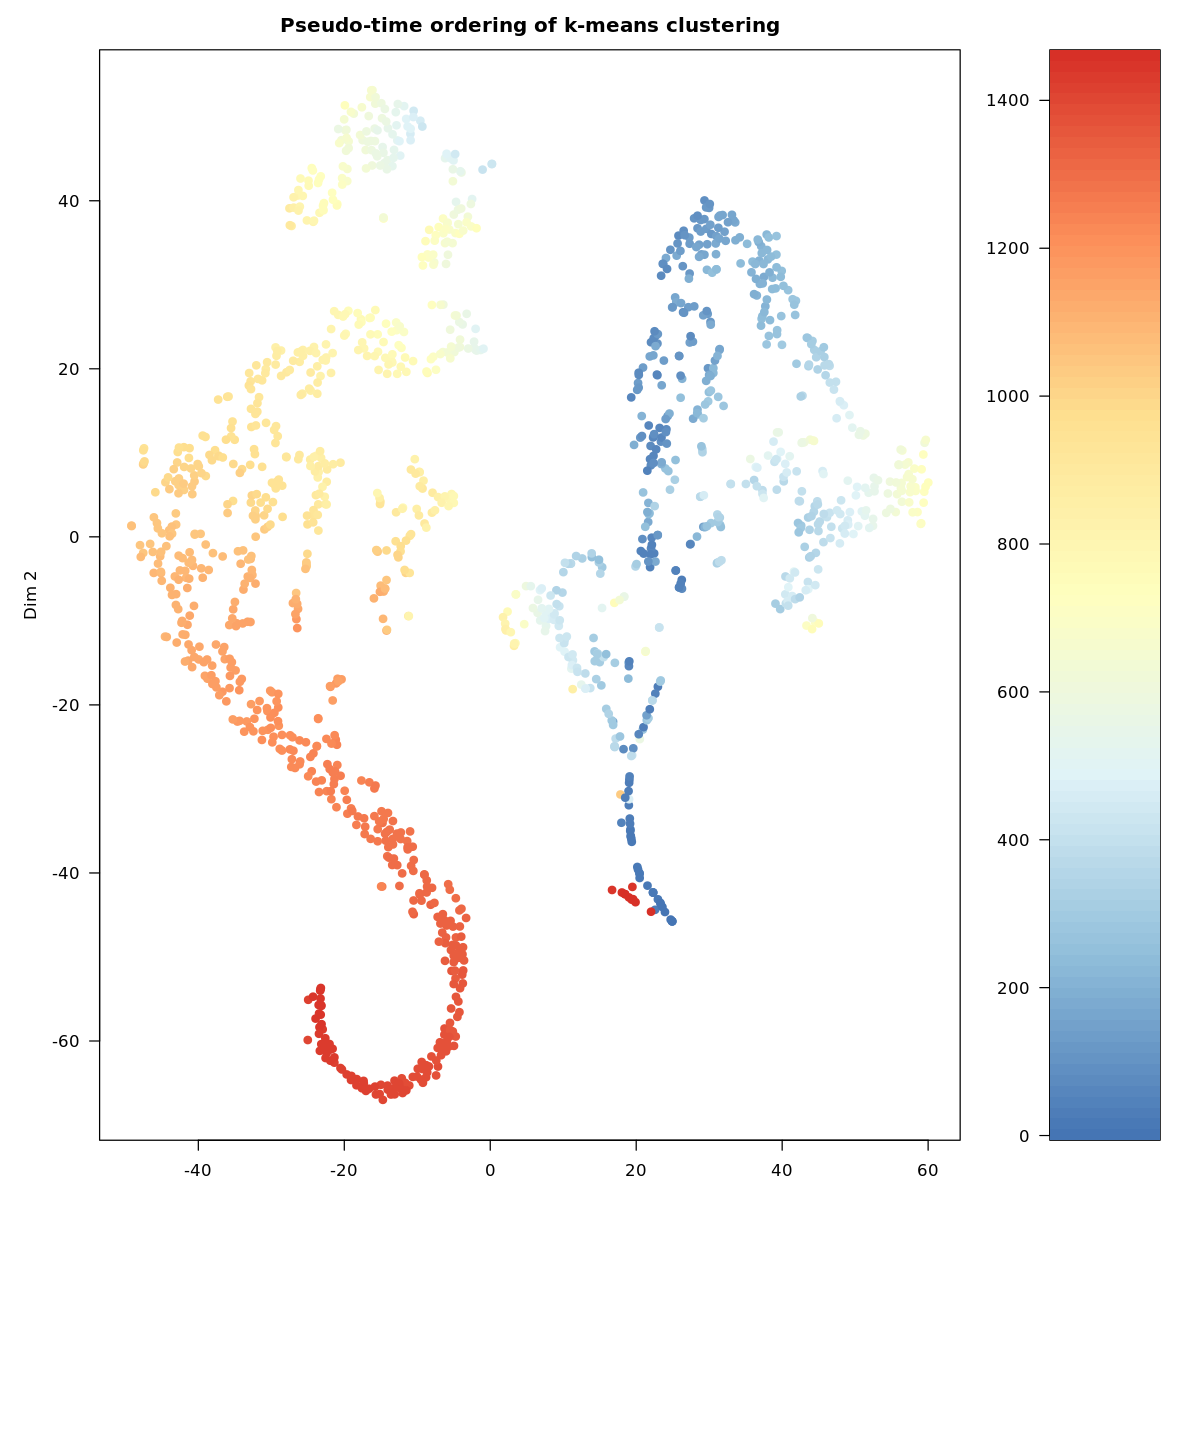

In [25]:
sc<-pseudoTimeOrdering(sc,quiet = TRUE, export = FALSE)
plotOrderTsne(sc)